# LSTM Classifier playground

In [49]:
import numpy as np

from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Embedding, Masking

from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam, RMSprop

from tensorflow.keras.metrics import Precision, Recall
from tensorflow_addons.metrics import F1Score

from tensorflow.keras.initializers import GlorotUniform

In [50]:
data_path = "../datasets/sentiment140/processed/02/"

In [51]:
X_train = np.load(data_path + 'X_train.npy').astype('float32')
Y_train = np.load(data_path + 'Y_train.npy').astype('float32')
X_test = np.load(data_path + 'X_test.npy').astype('float32')
Y_test = np.load(data_path + 'Y_test.npy').astype('float32')

In [52]:
max_len = 32

# def RNN():
#     inputs = Input(name='inputs', shape=[max_len])
#     layer = Embedding(1000, 64, input_length=max_len, mask_zero=True)(inputs)
#     layer = Masking(mask_value=0.0)(layer)
#     layer = LSTM(64, activation='relu')(layer)
#     layer = Dropout(0.2)(layer)
#     layer = Dense(1,activation='softmax')(layer)
#     model = Model(inputs=inputs,outputs=layer)
#     return model

def RNN():
    inputs = Input(name='inputs', shape=[max_len])
    inputs = Dense(max_len, kernel_initializer=GlorotUniform())(inputs)
    layer = Embedding(1000, 64, input_length=max_len, mask_zero=True)(inputs)
    layer = Masking(mask_value=0.0)(layer)
    layer = LSTM(64, activation='relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(1, activation='softmax')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [53]:

model = RNN()
model.summary()
model.compile(
    loss='squared_hinge',
    optimizer=Adam(),
    metrics=['accuracy', Precision(), Recall(), F1Score(num_classes=1, threshold=0.5)]
)

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32)]              0         
                                                                 
 embedding_11 (Embedding)    (None, 32, 64)            64000     
                                                                 
 masking_11 (Masking)        (None, 32, 64)            0         
                                                                 
 lstm_11 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 97,089
Trainable params: 97,089
Non-trainabl

In [54]:
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10


2022-04-27 00:56:14.600987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8500/8500 [==============================] - ETA: 0s - loss: 1.9989 - accuracy: 0.5003 - precision_11: 0.5003 - recall_11: 1.0000 - f1_score: 0.6669

2022-04-27 02:39:22.177574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8500/8500 [==============================] - 6383s 751ms/step - loss: 1.9989 - accuracy: 0.5003 - precision_11: 0.5003 - recall_11: 1.0000 - f1_score: 0.6669 - val_loss: 2.0020 - val_accuracy: 0.4995 - val_precision_11: 0.4995 - val_recall_11: 1.0000 - val_f1_score: 0.6662
Epoch 2/10
8500/8500 [==============================] - 6474s 762ms/step - loss: 1.9989 - accuracy: 0.5003 - precision_11: 0.5003 - recall_11: 1.0000 - f1_score: 0.6669 - val_loss: 2.0020 - val_accuracy: 0.4995 - val_precision_11: 0.4995 - val_recall_11: 1.0000 - val_f1_score: 0.6662
Epoch 3/10
8500/8500 [==============================] - 6530s 768ms/step - loss: 1.9989 - accuracy: 0.5003 - precision_11: 0.5003 - recall_11: 1.0000 - f1_score: 0.6669 - val_loss: 2.0020 - val_accuracy: 0.4995 - val_precision_11: 0.4995 - val_recall_11: 1.0000 - val_f1_score: 0.6662
Epoch 4/10
8500/8500 [==============================] - 6966s 820ms/step - loss: 1.9989 - accuracy: 0.5003 - precision_11: 0.5003 - recall_11: 1.0000 - f1_s

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test, Y_test)

2022-04-15 02:35:02.464425: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-15 02:35:02.611816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7500/7500 [==============================] - 165s 22ms/step - loss: 0.6932 - accuracy: 0.5000


In [ ]:
# y_true = Y_test
# y_pred = model.predict(X_test)

2022-04-15 02:37:48.310036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-15 02:37:48.372764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 

In [ ]:
# metric = F1Score(num_classes=1, threshold=0.5)

# metric.update_state(y_true, y_pred)
# result = metric.result()
# result.numpy()

array([0.79302967], dtype=float32)

In [ ]:
# m = Recall()
# m.update_state(y_true, y_pred)
# m.result().numpy()

0.8211869

In [ ]:
# m = Precision()
# m.update_state(y_true, y_pred)
# m.result().numpy()

0.7667393

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices()


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


/Users/nikolaystanishev/miniforge3/envs/abridge/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


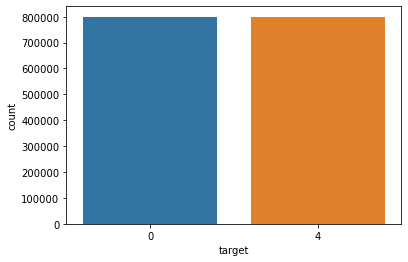

In [5]:
import pandas as pd
import seaborn as sns

dataset_df = pd.read_csv('../datasets/sentiment140/training.1600000.processed.noemoticon.csv', names=["target", "ids", "date", "flag", "user", "text"], encoding="latin-1")
dataset_df.info()
sns.countplot(dataset_df.target)
dataset_df.head()

In [6]:
from sklearn.preprocessing import LabelEncoder

dataset_df.drop(["ids", "date", "flag", "user"],axis=1,inplace=True)

X = dataset_df.text
Y = dataset_df.target
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)


In [9]:
from tensorflow.keras.layers import Activation

def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [10]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-04-21 14:26:17.656545: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-21 14:26:17.657490: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])


Epoch 1/10


2022-04-21 14:26:32.855993: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-21 14:26:33.478674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-21 14:26:33.669984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-21 14:26:33.981647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7068/8500 [=======================>......] - ETA: 1:00 - loss: 0.6909 - accuracy: 0.5044

In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)


In [ ]:
accr = model.evaluate(test_sequences_matrix,Y_test)


In [48]:
Y_train

array([1., 0., 0., ..., 1., 0., 1.], dtype=float32)